Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

c:\Users\Alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 18s 24ms/step - loss: 0.3716 - accuracy: 0.8677 - val_loss: 0.3189 - val_accuracy: 0.8831
Epoch 3/30
750/750 [==============================] - 18s 24ms/step - loss: 0.3191 - accuracy: 0.8845 - val_loss: 0.3079 - val_accuracy: 0.8852
Epoch 4/30
750/750 [==============================] - 18s 25ms/step - loss: 0.2882 - accuracy: 0.8942 - val_loss: 0.2793 - val_accuracy: 0.8992
Epoch 5/30
750/750 [==============================] - 18s 25ms/step - loss: 0.2657 - accuracy: 0.9033 - val_loss: 0.2734 - val_accuracy: 0.8971
Epoch 6/30
750/750 [==============================] - 18s 24ms/step - loss: 0.2454 - accuracy: 0.9102 - val_loss: 0.2632 - val_accuracy: 0.9038
Epoch 7/30
750/750 [==============================] - 18s 25ms/step - loss: 0.2273 - accuracy: 0.9160 - val_loss: 0.2630 - val_accuracy: 0.9026
Epoch 8/30
750/750 [==============================] - 18s 25ms/step - loss: 0.2111 - accuracy: 0.9214 - val_loss: 0.2446 - val_accuracy: 0.9122
Epo

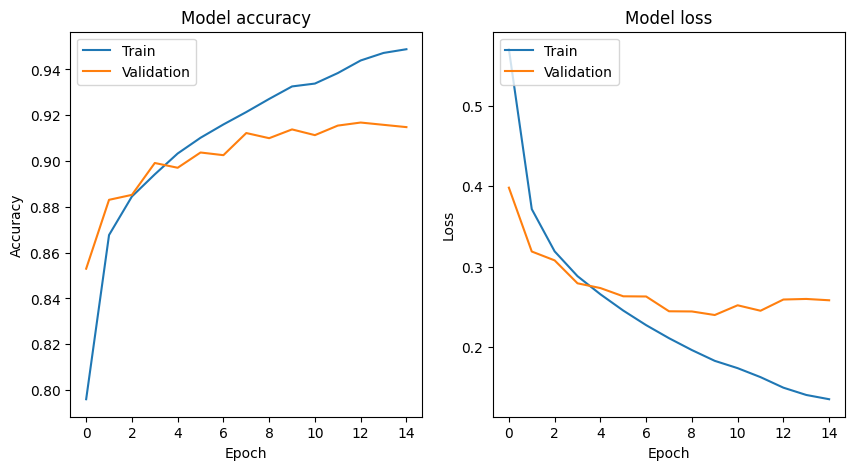

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(image_data_train, label_train), (image_data_test, label_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
image_data_train = image_data_train / 255.0
image_data_test = image_data_test / 255.0

# Reshape the input data to have rank 4 (batch_size, height, width, channels)
image_data_train = image_data_train.reshape(-1, 28, 28, 1)
image_data_test = image_data_test.reshape(-1, 28, 28, 1)

# Define a custom CNN architecture for Fashion MNIST
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Early Stopping and Model Checkpoints
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Catch best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'fashion_mnist_best_model.h5',
    save_best_only=True
)

# Hyperparameters
NUM_EPOCHS = 30
BATCH_SIZE = 64

# Train the CNN
history = model.fit(
    image_data_train, label_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(image_data_test, label_test)
print(f"Test accuracy: {test_accuracy:.2%}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 1s 4ms/step
Predicited item: Shirt


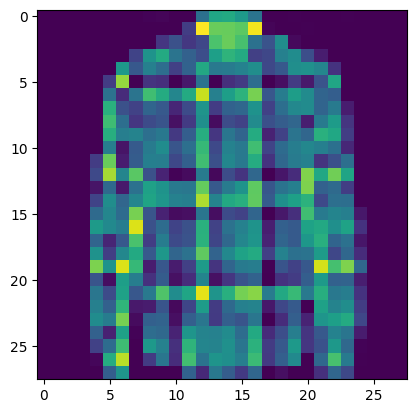

In [6]:
options = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankleboot",
    }

def make_prediction(instance):
    most_likely = np.argmax(model.predict(image_data_test)[instance])

    prediction = options[most_likely]

    print(f"Predicited item: {prediction}")
    plt.imshow(image_data_test[instance].reshape(28, 28))

make_prediction(7)
